# metrics - honduras

Abril 2023

### Diana Jaimes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import glob
import datetime
from datetime import datetime
import re
from datetime import datetime, date, timedelta


##=====================================================
#metrics
##=====================================================


from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import kendalltau
import scipy.stats as stats


In [2]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Parameters:

In [3]:
folder = 'Z:\\1.Data\\Honduras\\raw\\monthly\\'
feature = 'prec'
output_path='Z:\\1.Data\\Honduras\\results\\metrics\\'
overall_file='metrics_overall.csv'
monthly_file='metrics_monthly.csv'

# Overall

In [156]:
prec_overall = pd.read_csv('Z:\\1.Data\\Honduras\\results\\metrics\\'+'prec_metrics_overall.csv')
prec_overall.rename(columns={'Unnamed: 0':'estacion'}, inplace=True)


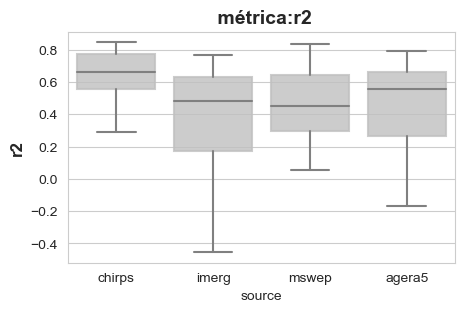

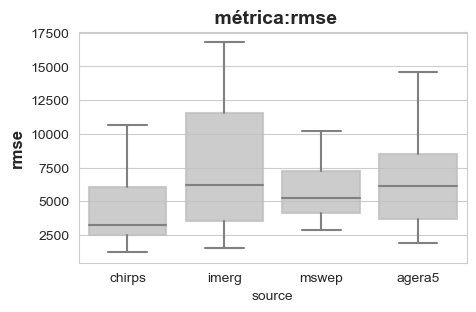

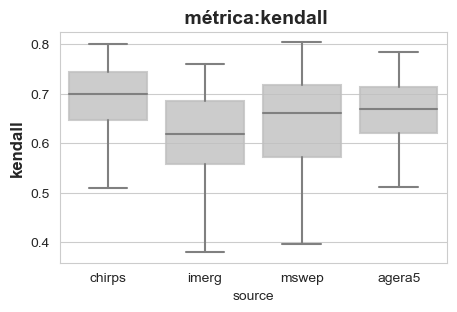

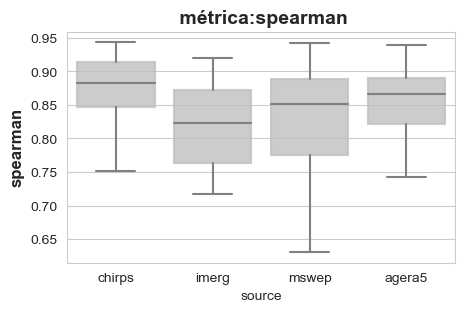

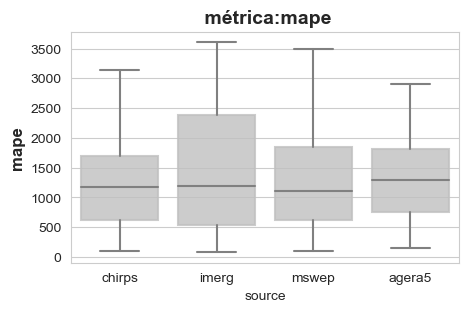

In [170]:
for metric in prec_overall.columns.to_list()[1:-1]: 
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, figsize=(5, 3))
    palette = ['deeppink', 'palegreen', 'orange', 'skyblue']
    fig = sns.boxplot(data = prec_overall, x="source", y=f'{metric}', 
                      showfliers = False, palette=palette,
            boxprops=dict(facecolor='grey', color='silver', alpha=0.8),
            capprops=dict(color='grey'),
            whiskerprops=dict(color='grey'),
            flierprops=dict(color='grey', markeredgecolor='grey'),
            medianprops=dict(color='grey'))
    #fig.set_xlabel('Fuente', fontsize= 12, fontweight='bold')
    fig.set_ylabel(f'{metric}', fontsize= 12, fontweight='bold')
    fig.set_title(' métrica:' + f'{metric}', fontsize= 14, fontweight='bold');

# per month

In [158]:
prec_monthly = pd.read_csv('Z:\\1.Data\\Honduras\\results\\metrics\\'+'prec_metrics_monthly.csv')
prec_monthly.rename(columns={'Unnamed: 0':'estacion'}, inplace=True)

In [159]:
prec_monthly

,estacion,r2,rmse,kendall,spearman,mape,month,source
0,ESQUIAS,-1.364967,215.194945,0.495365,0.661284,129.991698,1,agera5
1,LA ERMITA,-0.605987,167.219602,0.374155,0.556695,194.507470,1,agera5
2,SULACO,-9.500692,476.798633,0.340622,0.526644,792.389450,1,agera5
3,PLAYITAS,-195.397964,4326.571111,0.239640,0.326456,1414.823742,1,agera5
4,FLORES,-8.149145,495.889084,0.196186,0.327213,920.338545,1,agera5
...,...,...,...,...,...,...,...,...
2203,NAMASIGUE,0.001475,242.964446,0.321326,0.390394,633.639902,12,mswep
2204,SABANA GRANDE,-17.007114,413.592339,0.313703,0.423544,692.022319,12,mswep
2205,LA LABOR,-45.697231,1527.346376,0.296347,0.412959,496.137009,12,mswep
2206,LA MESA,-5.903158,14688.554352,0.257760,0.360121,89.857323,12,mswep


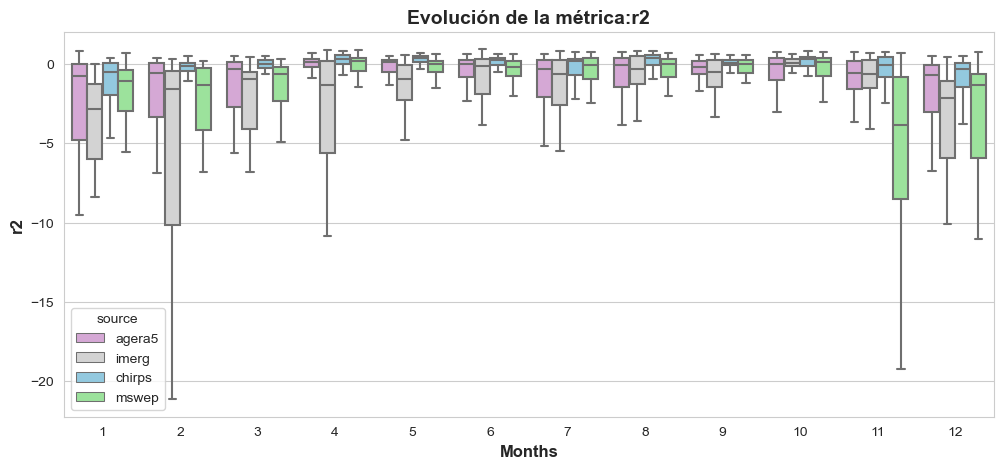

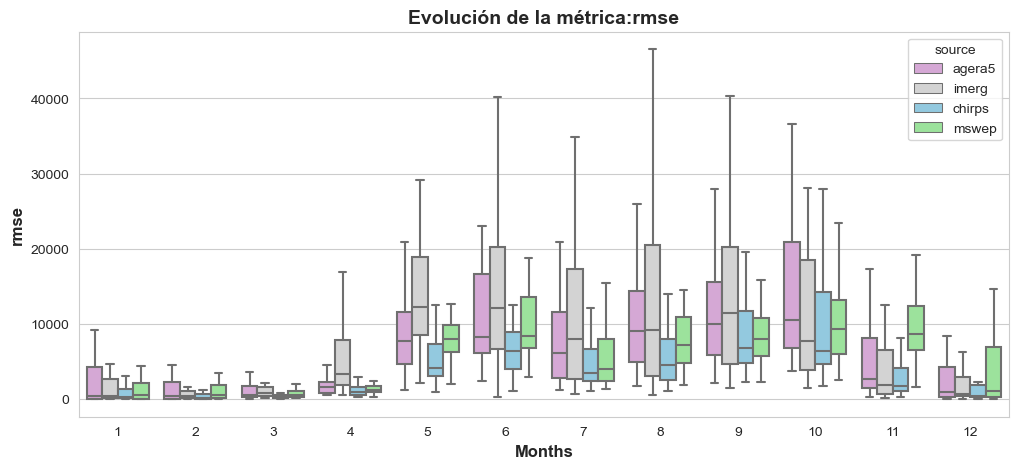

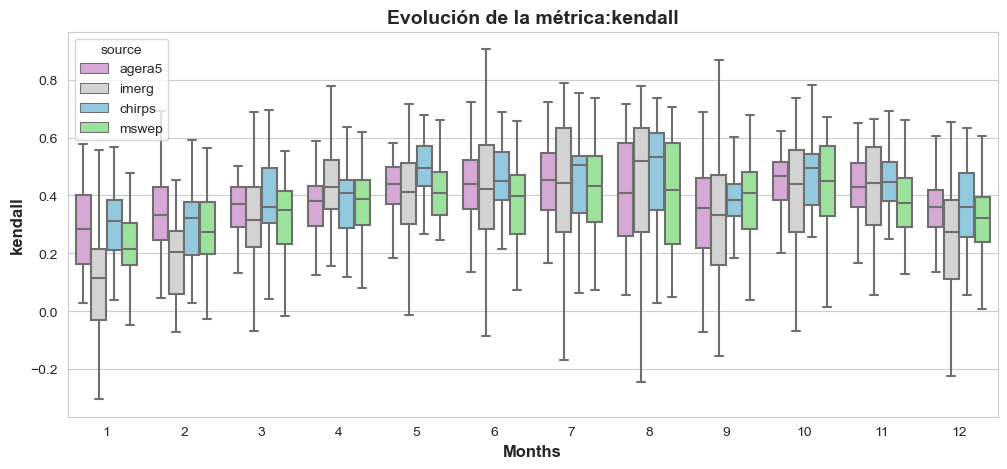

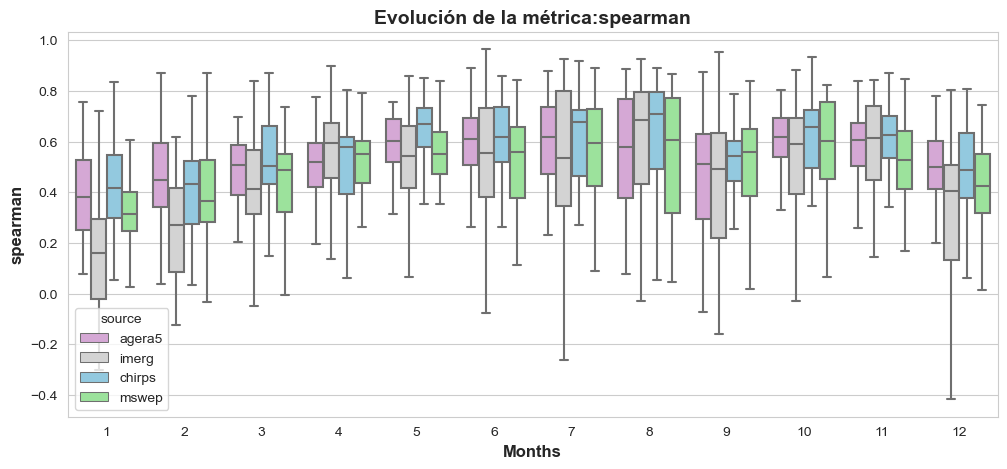

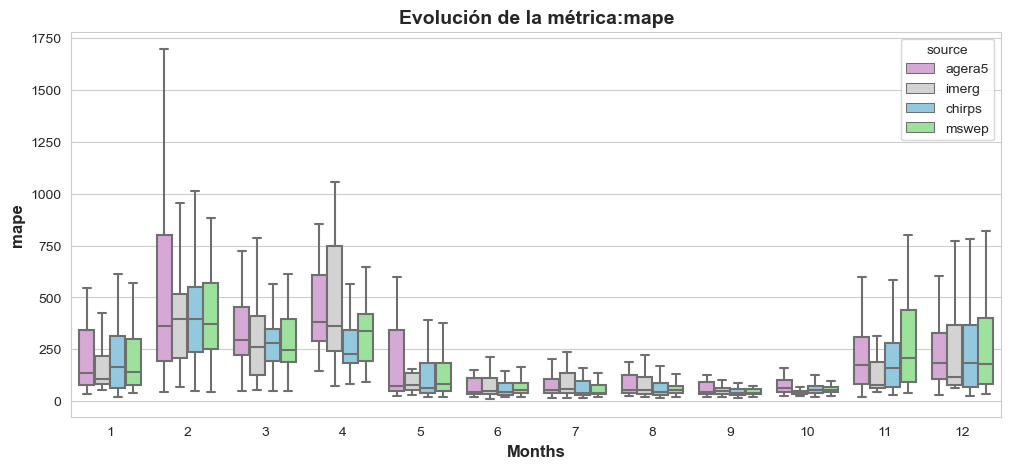

In [175]:
for metric in prec_monthly.columns.to_list()[1:-2]: 
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, figsize=(12, 5))
    palette = ['plum', 'lightgray', 'skyblue', 'lightgreen']
    fig = sns.boxplot(data = prec_monthly, x="month", y=f'{metric}',
                      hue='source', showfliers = False, palette=palette)
    fig.set_xlabel('Months', fontsize= 12, fontweight='bold')
    fig.set_ylabel(f'{metric}', fontsize= 12, fontweight='bold')
    fig.set_title('Evolución de la métrica:' + f'{metric}', fontsize= 14, fontweight='bold');